# Project

In [33]:
import numpy as np
import math
import time
from computer_vision import *
from dijkstra import compute_shortest_path
import tdmclient.notebook
await tdmclient.notebook.start()


In [59]:
# parametres
speed_r = 100
time_rotation = 7*speed_r/125
speed_f = 100
stop = 0
MIN_DIST = 30
ANGLE_TOLERANCE = 0.35

@tdmclient.notebook.sync_var
def motors(l_speed=500, r_speed=500):
    """
    Sets the motor speeds of the Thymio 
    param l_speed: left motor speed
    param r_speed: right motor speed
    """
    global motor_left_target, motor_right_target
    
    motor_left_target = l_speed
    motor_right_target = r_speed

#input : angle to change the trajectory
@tdmclient.notebook.sync_var
def orientation (angle):  
 #   global motor_left_target, motor_right_target
    if(angle >= 0 ):
        motors(-speed_r, speed_r)
    else:
        motors(speed_r, -speed_r)    

def get_angle_between(vec1, vec2):
    vec1_unit = vec1 / np.linalg.norm(vec1)
    vec2_unit = vec2 / np.linalg.norm(vec2)

    return np.arccos(np.dot(vec1_unit, vec2_unit))

def distance (x1, y1, x2, y2):
    dist = np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))
    return dist

In [75]:
def mouving (video_capture, path, x0, y0, theta0, periode=0.01):
    teta = np.zeros(np.shape(path)[0])
    speed_l = speed_r = 0
    goalx = path[0][0]
    goaly = path[0][1]
    
    i = 0
    x_pense = x0
    y_pense = y0
    teta_pense = theta0
    
    kx = 0
    ky = 0
    kteta = 0
   
    print('x =', x_pense, 'y =', y_pense, 'teta =', teta_pense)

    while i < np.shape(path)[0]-1:       
        ret, frame = video_capture.read()
        
    # step 1 : Computer Vision
        if ret == True:
            position_measure = []
            position_measure, position_contour,_ = computer_vision(frame, 'robot', False)
            position_measure = position_measure[0]
            if position_measure is not None:
                _, theta_measure = get_robot_position(frame, position_measure, position_contour)
            position_measure = invert_coordinates(position_measure)
            [kx, ky, kteta] = [position_measure[0], position_measure[1], theta_measure]
        else:
            [kx, ky, kteta] = [x_pense, y_pense, teta_pense]
            
        print(ret, kx, ky, kteta)
        
        teta[i] = math.atan2((goaly - ky), (goalx - kx)) 
        
        dist = distance (goalx, goaly, kx, ky)
        if (dist < MIN_DIST):
            print('i = ',i)
            i = i + 1
            goalx = path[i][0]
            goaly = path[i][1]
            x_pense = path[i-1][0]
            y_pense = path[i-1][1]
            vec1 = [np.cos(teta[i-1]), np.sin(teta[i-1])]
            vec2 = [goalx - x_pense, goaly - y_pense]
            angle = -get_angle_between(vec1, vec2)
            
            teta_pense = angle + teta[i-1]
            if np.abs(teta[i] + kteta) > ANGLE_TOLERANCE:
                orientation(angle)
        else :
            
            x_pense = kx + speed_f * periode * np.cos(teta[i])
            y_pense = ky + speed_f * periode * np.sin(teta[i])
            teta_pense = teta[i]
            kteta = teta[i]
            
            time.sleep(periode)
        motors(int(speed_l), int(speed_r))
   
    
    motors(stop, stop)
    

# Main 

1
2
3
[259 460] [1137  540]


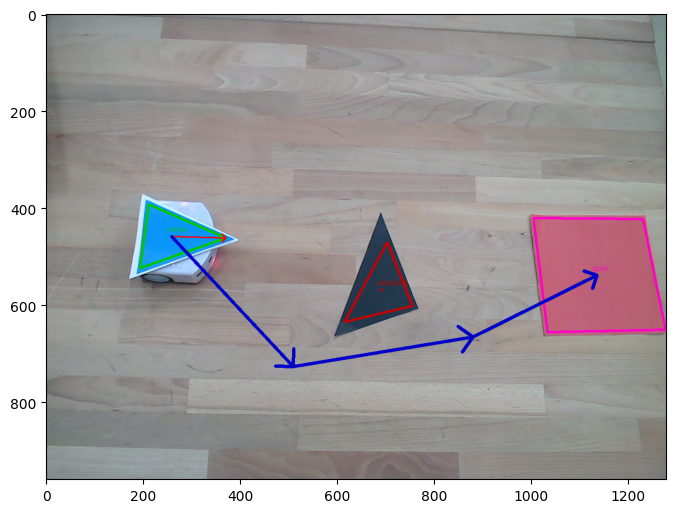

In [76]:
video_capture = cv2.VideoCapture(0,cv2.CAP_DSHOW)
fig, ax = plt.subplots(figsize=(8,8))
cv_successful, obst, robot, goal, frame = cv_start(video_capture, show_image= True, exposure=-7)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
obst = format_contour(obst)

if cv_successful:
    start = np.array([robot[0], robot[1]])
    goal = np.array([goal[0], goal[1]])
    print(start, goal)
    path = compute_shortest_path(obst, start, goal)
    path = np.rint(path).astype(int)
    frame = draw_path(frame, path) 

    for i in range(len(path)):
        path[i] = pixel_to_metric(path[i])
    start = pixel_to_metric(start)
    
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [77]:
for p in path:
    p = invert_coordinates(p)

start = invert_coordinates(start)
start = pixel_to_metric(start)

mouving(video_capture, path, robot[0], robot[1], robot[2], periode=0.01)

x = 259 y = 460 teta = 0.026779311019766005
True 259 500 0.026779311019766005
True 259 500 0.026779311019766005
True 259 499 0.026779311019766005
True 268 497 0.07259945373049462
True 279 494 0.12659212727997207
True 292 490 0.1920480172407301
True 304 484 0.25594313600468205
True 316 478 0.3217505543966422
True 330 470 0.3906070436976868
True 341 463 0.43496695104557986
True 352 456 0.4636476090008061
True 365 447 0.5123894603107377
True 376 440 0.5326436072295171
True 386 433 0.5481235080980843
True 399 423 0.5528412215925392
True 411 415 0.5481235080980843
True 424 407 0.5358112379604637
True 437 399 0.523575764122014
True 450 391 0.5036262961240962
True 465 384 0.48364494297395666
True 476 378 0.4676001575875563
True 491 372 0.4398425828157362
True 506 367 0.3968181439505531
True 518 361 0.34952119099006324
True 532 356 0.3189957404287853
True 546 352 0.2914567944778671
True 560 348 0.2662520491509254
True 574 345 0.24069603406324405
True 587 341 0.22347660114063303
True 603 338 0.

IndexError: list index out of range